In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
def zona_test():
    KMTNet_fields = pd.read_csv("/home/kasia/Documents/OMEGA/OMEGA2_Gaia_sim/kmtnet_zona.csv", header=0)
    coord = np.hstack((KMTNet_fields["ra"].values.reshape(len(KMTNet_fields["ra"]), 1),
                         KMTNet_fields["dec"].values.reshape(len(KMTNet_fields["ra"]), 1)))
    coord = coord.tolist()
    coord.append(coord[0])


    file_name = "GSA_2016_2021_catalog.csv"
    gsa_events = pd.read_csv(file_name, header=0)
    xs, ys = zip(*coord)

    remove_idx = exclude_KMTNet_fields(gsa_events["#Name"], gsa_events["Ra_deg"], gsa_events["Dec_deg"])
    to_remove_ra, to_remove_dec = gsa_events["Ra_deg"].iloc[remove_idx], gsa_events["Dec_deg"].iloc[remove_idx]

    plt.figure()
    plt.scatter(gsa_events["Ra_deg"], gsa_events["Dec_deg"], s=10)
    plt.scatter(to_remove_ra, to_remove_dec, color="yellow", s=5)
    plt.plot(xs, ys, color='black', zorder=10)
    plt.show()
    
def exclude_KMTNet_fields(names, ra, dec):
    KMTNet_fields = pd.read_csv("kmtnet_zona.csv", header=0)
    remove_idx = []

    exclusion_zone = Polygon(zip(KMTNet_fields["ra"], KMTNet_fields["dec"]))
    for i in range(len(names)):
        point = Point(ra[i], dec[i])
        if(exclusion_zone.contains(point)):
            remove_idx.append(i)
            # print("%s: Within KMTNet exclusion zone."%(names[i]))

    return np.array(remove_idx)

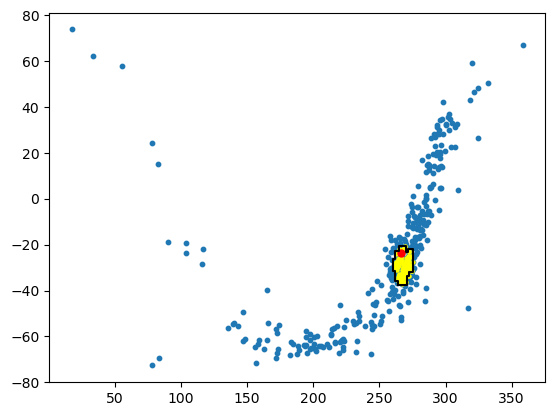

In [3]:
KMTNet_fields = pd.read_csv("kmtnet_zona.csv", header=0)
coord = np.hstack((KMTNet_fields["ra"].values.reshape(len(KMTNet_fields["ra"]), 1),
                     KMTNet_fields["dec"].values.reshape(len(KMTNet_fields["ra"]), 1)))
coord = coord.tolist()
coord.append(coord[0])


file_name = "GSA_2016_2021_catalog.csv"
gsa_events = pd.read_csv(file_name, header=0)
xs, ys = zip(*coord)

remove_idx = exclude_KMTNet_fields(gsa_events["#Name"], gsa_events["Ra_deg"], gsa_events["Dec_deg"])
to_remove_ra, to_remove_dec = gsa_events["Ra_deg"].iloc[remove_idx], gsa_events["Dec_deg"].iloc[remove_idx]

plt.figure()
plt.scatter(gsa_events["Ra_deg"], gsa_events["Dec_deg"], s=10)
plt.scatter(to_remove_ra, to_remove_dec, color="yellow", s=5)
plt.scatter(266.5, -23.8
            , color="red", s=25)
plt.plot(xs, ys, color='black', zorder=10)

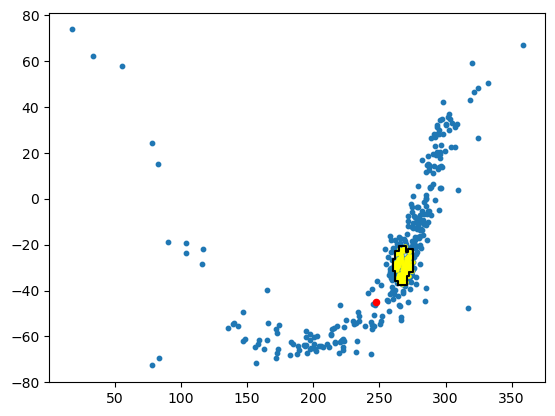

In [4]:
plt.figure()
plt.scatter(gsa_events["Ra_deg"], gsa_events["Dec_deg"], s=10)
plt.scatter(to_remove_ra, to_remove_dec, color="yellow", s=5)
plt.plot(xs, ys, color='black', zorder=10)

gaia_index = gsa_events[gsa_events["#Name"] == "Gaia21dvx"].index
plt.scatter(gsa_events["Ra_deg"].values[gaia_index], gsa_events["Dec_deg"].values[gaia_index], s=20, color='red')
plt.show()